In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc #Medir Acurácia e imprimir um relatório com as principais métricas
from sklearn.metrics import mean_squared_error #Medir erro quadrado médio
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier #Multilayer Perceptron para Classificação
from sklearn.neural_network import MLPRegressor #Multilayer Perceptron para Regressão
from yellowbrick.classifier import ConfusionMatrix #Criação de uma matriz de confusão
import plotly.graph_objects as go #Plotar Gráficos
from plotly.subplots import make_subplots #Criar Subplots
import scikitplot as skplt
import seaborn as sns
import matplotlib.pyplot as plt

#Classification

The data can be find here: [UCI Rep](https://archive.ics.uci.edu/ml/datasets/Dermatology)

ID -> Integer

* 1: erythema
* 2: scaling
* 3: definite borders
* 4: itching
* 5: koebner phenomenon
* 6: polygonal papules
* 7: follicular papules
* 8: oral mucosal involvement
* 9: knee and elbow involvement
* 10: scalp involvement
* 11: family history, (0 or 1)
* 34: Age (linear)

Histopathological Attributes: (take values 0, 1, 2, 3)
* 12: melanin incontinence
* 13: eosinophils in the infiltrate
* 14: PNL infiltrate
* 15: fibrosis of the papillary dermis
* 16: exocytosis
* 17: acanthosis
* 18: hyperkeratosis
* 19: parakeratosis
* 20: clubbing of the rete ridges
* 21: elongation of the rete ridges
* 22: thinning of the suprapapillary epidermis
* 23: spongiform pustule
* 24: munro microabcess
* 25: focal hypergranulosis
* 26: disappearance of the granular layer
* 27: vacuolisation and damage of basal layer
* 28: spongiosis
* 29: saw-tooth appearance of retes
* 30: follicular horn plug
* 31: perifollicular parakeratosis
* 32: inflammatory monoluclear inflitrate
* 33: band-like infiltrate

In [ ]:
df = pd.read_csv('dermatology.csv')
df.head()

,2,2.1,0,3,0.1,0.2,0.3,0.4,1,0.5,...,0.19,0.20,3.2,0.21,0.22,0.23,1.1,0.24,55,2.3
0,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
1,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
2,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
3,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
4,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2


In [ ]:
df.shape

(365, 35)

In [ ]:
df.columns = ['erythema', 'scaling', 'definite borders', 'itching', 'koebner_phenomenon', 'polygonal_papules', 'follicular_papules', 
              'oral_mucosal_involvement', 'knee_and_elbow_involvement', 'scalp_involvement', 'family_history', 'melanin incontinence',
              'eosinophils_in_the infiltrate', 'PNL_infiltrate', 'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis', 'hyperkeratosis',
              'parakeratosis', 'clubbing_of_the_rete_ridges', 'elongation_of_the_rete_ridges', 'thinning_of_the_suprapapillary_epidermis',
              'spongiform_pustule', 'munro_microabcess', 'focal_hypergranulosis', 'disappearance_of_the_granular_layer', 
              'vacuolisation_and_damage_of_basal_layer', 'spongiosis', 'saw_tooth_appearance_of_retes', 'follicular_horn_plug',
              'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate', 'band_like_infiltrate', 'age', 'class']

df.columns

Index(['erythema', 'scaling', 'definite borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin incontinence',
       'eosinophils_in_the infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw_tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band_like_infiltrate', 'age', 'class'],
      dtype='object')

In [ ]:
for i in df.columns:
  print(df[i].value_counts())
  print("\n")

2    214
3     90
1     57
0      4
Name: erythema, dtype: int64


2    194
1    111
3     52
0      8
Name: scaling, dtype: int64


2    168
1     93
0     58
3     46
Name: definite borders, dtype: int64


0    118
2    100
3     75
1     72
Name: itching, dtype: int64


0    223
1     70
2     54
3     18
Name: koebner_phenomenon, dtype: int64


0    296
2     41
3     27
1      1
Name: polygonal_papules, dtype: int64


0    332
2     16
1     11
3      6
Name: follicular_papules, dtype: int64


0    298
2     45
3     13
1      9
Name: oral_mucosal_involvement, dtype: int64


0    251
2     64
1     27
3     23
Name: knee_and_elbow_involvement, dtype: int64


0    263
2     56
1     30
3     16
Name: scalp_involvement, dtype: int64


0    319
1     46
Name: family_history, dtype: int64


0    295
2     46
3     16
1      8
Name: melanin incontinence, dtype: int64


0    323
1     33
2      9
Name: eosinophils_in_the infiltrate, dtype: int64


0    234
1     69
2     55
3      7
Nam

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  365 non-null    int64 
 1   scaling                                   365 non-null    int64 
 2   definite borders                          365 non-null    int64 
 3   itching                                   365 non-null    int64 
 4   koebner_phenomenon                        365 non-null    int64 
 5   polygonal_papules                         365 non-null    int64 
 6   follicular_papules                        365 non-null    int64 
 7   oral_mucosal_involvement                  365 non-null    int64 
 8   knee_and_elbow_involvement                365 non-null    int64 
 9   scalp_involvement                         365 non-null    int64 
 10  family_history                            365 non-

In [ ]:
df.isnull().sum()

erythema                                    0
scaling                                     0
definite borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin incontinence                        0
eosinophils_in_the infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df['age'] == "?"].shape[0]

8

In [ ]:
df = df[df['age'] != "?"]
df.shape

(357, 35)

In [ ]:
df['class'].value_counts()

1    111
3     71
2     59
5     48
4     48
6     20
Name: class, dtype: int64

As we can see here, the classes in our dataset are unbalanced. So I'm going to split the code into two parts. For the first part, we will use the unbalanced classes and try to get the best score for the model. In the second part, we'll oversampling the data, which means we do a transformation on the data, creating new examples so the classes are all the same size.

In [ ]:
colors = ['lightslategray', 'crimson', '#330C73', '#008B8B', '#8A2BE2', '#8B008B']

layout = go.Layout(title=dict(text="Number of each class in the dataset", font=dict(size=25)), xaxis= {'title':'Class'},
                   yaxis=dict(title='Nº'), hovermode='closest')

data = go.Histogram(x=df['class'], marker_color=colors, text=df['class'].value_counts(), textfont=dict(size=15), textposition='outside')

fig = go.Figure(data=data, layout=layout)

fig.show()


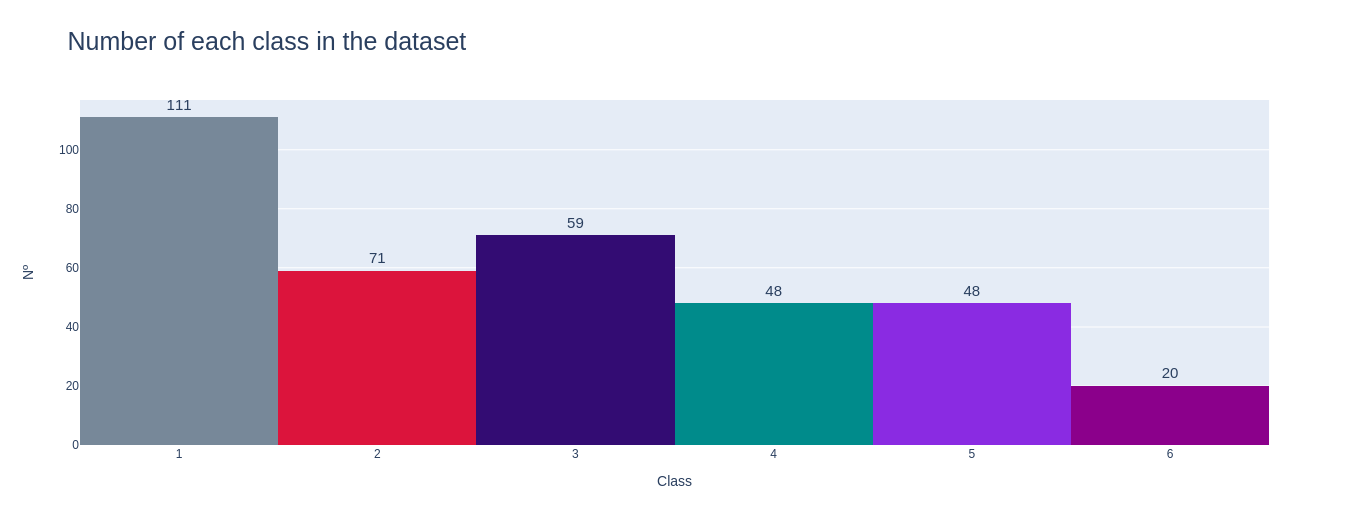

In [ ]:
x = df.drop(columns=['class'])
y = df['class']

###Normalization

In [ ]:
scaler = MinMaxScaler()
new_x = scaler.fit_transform(x)

print(new_x)

[[1.         1.         1.         ... 0.33333333 0.         0.10666667]
 [0.66666667 0.33333333 0.66666667 ... 0.66666667 1.         0.34666667]
 [0.66666667 0.66666667 0.66666667 ... 1.         0.         0.53333333]
 ...
 [1.         0.66666667 0.66666667 ... 0.66666667 1.         0.37333333]
 [0.66666667 0.33333333 1.         ... 0.66666667 1.         0.66666667]
 [1.         0.66666667 0.66666667 ... 1.         0.         0.46666667]]


###Separate the data in train and test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.33)
print("Size train data: ", x_train.shape)
print("Size test data: ", x_test.shape)

Size train data:  (239, 34)
Size test data:  (118, 34)


###Grid Search

I chose to use the grid search because with it I can test several parameters. It has a lower performance than Randomized Search, but I believe it will work for this case. With it we can test several network topologies, and choose the one that has the best performance.

In [ ]:
parameters = {'solver': ['lbfgs'],
              'max_iter': [1000,1100,1200,1300,1400,1800,1900,2000 ], 
              'alpha': 10.0 ** -np.arange(1, 10),
              'hidden_layer_sizes':np.arange(10, 15),
              'random_state':[0],
              'momentum': [0.1, 0.5, 0.9, 1]}


grid = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, )

In [ ]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([10, 11, 12, 13, 14]),
                         'max_iter': [1000, 1100, 1200, 1300, 1400, 1800, 1900,
                                      2000],
                         'momentum': [0.1, 0.5, 0.9, 1], 'random_state': [0],
                         'solver': ['lbfgs']})

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.80386968, 0.79437485, 1.29195271, ..., 0.03899112, 0.03832226,
        0.03723149]),
 'std_fit_time': array([0.30880192, 0.2146827 , 0.30611255, ..., 0.0028348 , 0.00368473,
        0.00349217]),
 'mean_score_time': array([0.00164237, 0.0017488 , 0.00110922, ..., 0.00089126, 0.00088468,
        0.00100837]),
 'std_score_time': array([9.28605194e-04, 1.65465540e-03, 4.48612408e-04, ...,
        3.69419260e-05, 1.78700093e-05, 3.90332927e-04]),
 'param_alpha': masked_array(data=[0.1, 0.1, 0.1, ..., 1e-09, 1e-09, 1e-09],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[10, 10, 10, ..., 14, 14, 14],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[1000, 1000, 1000, ..., 2000, 2000, 2000],
              mask=[False, False, False, ..., False

In [ ]:
grid.best_params_

{'alpha': 0.001,
 'hidden_layer_sizes': 13,
 'max_iter': 1000,
 'momentum': 0.1,
 'random_state': 0,
 'solver': 'lbfgs'}

In [ ]:
grid.best_score_

0.9708333333333334

###Retraining the model with best paramenters

In [ ]:
model = MLPClassifier(alpha=0.001, hidden_layer_sizes=13,
 max_iter=1000, random_state=0, solver='lbfgs', momentum=0.1)

model.fit(x_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=13, max_iter=1000, momentum=0.1,
              random_state=0, solver='lbfgs')

###Plot Learning Curve

The code of this function can be found here: [Plot Learning Curve - Sklearn]("https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py")


In [ ]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid(True)
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    
    # Plot n_samples vs fit_times
    axes[1].grid(True)
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    print("\n")
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model") 
   
    return plt

###Learning Curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

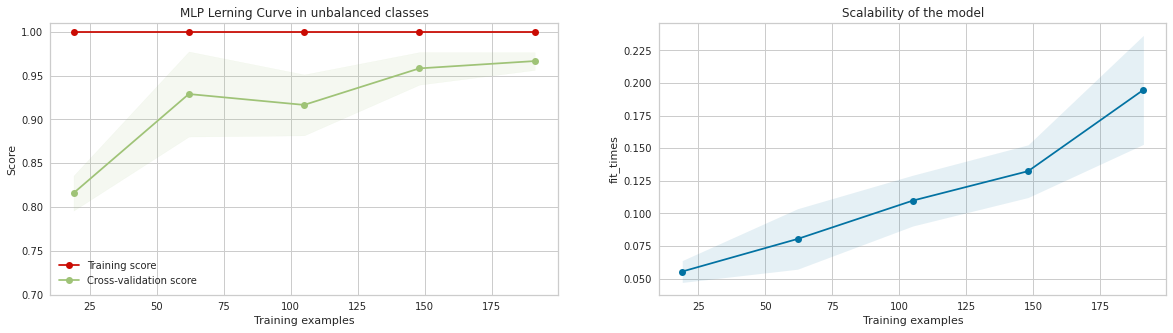

In [ ]:
sns.set_style('whitegrid')

plot_learning_curve(
    model,
    "MLP Lerning Curve in unbalanced classes",
    x_train,
    y_train,
    ylim=(0.7, 1.01),
    n_jobs=4,
    cv=5
)

##Results

In [ ]:
previsoes = model.predict(x_test)
previsoes

array([3, 3, 2, 3, 1, 1, 3, 3, 3, 1, 5, 3, 2, 5, 3, 5, 2, 2, 5, 4, 3, 1,
       1, 1, 3, 4, 2, 2, 1, 5, 1, 4, 5, 5, 3, 2, 5, 4, 6, 1, 1, 1, 5, 5,
       5, 4, 2, 4, 3, 5, 3, 1, 2, 3, 1, 5, 3, 1, 2, 2, 5, 5, 2, 5, 2, 1,
       3, 1, 3, 1, 2, 4, 4, 1, 1, 1, 1, 3, 3, 1, 2, 1, 4, 1, 4, 2, 1, 5,
       6, 4, 3, 4, 2, 3, 4, 3, 5, 2, 2, 1, 6, 5, 4, 5, 1, 3, 3, 3, 1, 1,
       3, 6, 4, 3, 5, 2, 6, 6])

In [ ]:
acuracia = accuracy_score(y_test, previsoes)
print("Acuracia: ", acuracia*100)

Acuracia:  94.91525423728814


In [ ]:
score_roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')
print("ROC AUC Score: {}".format(score_roc_auc*100))

ROC AUC Score: 99.69421538500485


###Precision-Recall Curve

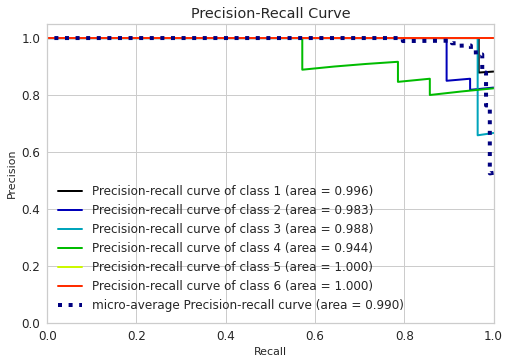

In [ ]:
probas = model.predict_proba(x_test)
skplt.metrics.plot_precision_recall(y_test, probas)

###ROC Curves

The ROC curve is important for us to understand how well our model is able to identify each class.

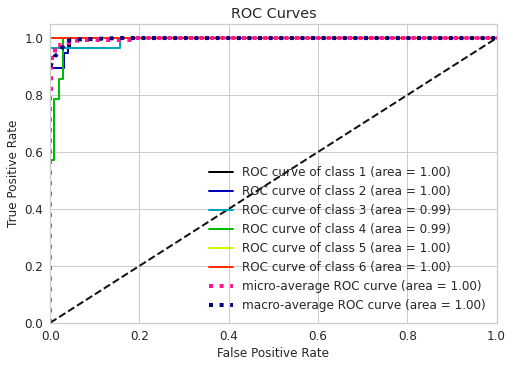

In [ ]:
skplt.metrics.plot_roc(y_test, probas)

##SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x, y)

In [ ]:
print(x_smote.head())

   erythema  scaling  definite borders  itching  koebner_phenomenon  \
0         3        3                 3        2                   1   
1         2        1                 2        3                   1   
2         2        2                 2        0                   0   
3         2        3                 2        2                   2   
4         2        3                 2        0                   0   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  3                   0                         3   
2                  0                   0                         0   
3                  2                   0                         2   
4                  0                   0                         0   

   knee_and_elbow_involvement  scalp_involvement  ...  focal_hypergranulosis  \
0                           1                  1  ...                   

In [ ]:
colors = ['lightslategray', 'crimson', '#330C73', '#008B8B', '#8A2BE2', '#8B008B']

layout = go.Layout(title=dict(text="Number of each class in the dataset with SMOTE", font=dict(size=25)), xaxis= {'title':'Class'},
                   yaxis=dict(title='Nº'), hovermode='closest')

data = go.Histogram(x=y_smote, marker_color=colors)

fig = go.Figure(data=data, layout=layout)

fig.show()


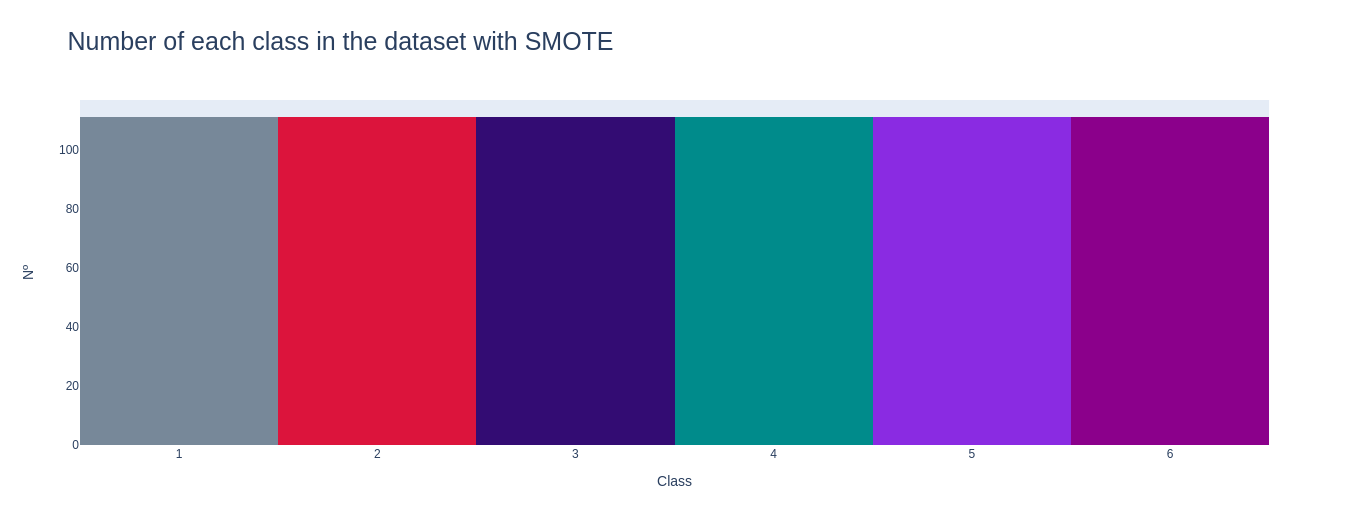

###Normalization

In [ ]:
scaler = MinMaxScaler()
new_x_smote = scaler.fit_transform(x_smote)

print(new_x_smote)

[[1.         1.         1.         ... 0.33333333 0.         0.10666667]
 [0.66666667 0.33333333 0.66666667 ... 0.66666667 1.         0.34666667]
 [0.66666667 0.66666667 0.66666667 ... 1.         0.         0.53333333]
 ...
 [0.66666667 0.66666667 0.33333333 ... 0.66666667 0.         0.10666667]
 [0.66666667 0.66666667 0.         ... 0.33333333 0.         0.13333333]
 [0.66666667 0.33333333 0.33333333 ... 0.33333333 0.         0.10666667]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_x_smote, y_smote, test_size=0.33)
print("Size train data: ", x_train.shape)
print("Size test data: ", x_test.shape)

Size train data:  (446, 34)
Size test data:  (220, 34)


###Grid Search

In [ ]:
parameters = {'solver': ['lbfgs'],
              'max_iter': [1000,1100,1200,1300,1400,1800,1900,2000 ], 
              'alpha': 10.0 ** -np.arange(1, 10),
              'hidden_layer_sizes':np.arange(10, 15),
              'random_state':[0],
               'momentum': [0.1, 0.5, 0.9, 1]}


grid = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)

In [ ]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([10, 11, 12, 13, 14]),
                         'max_iter': [1000, 1100, 1200, 1300, 1400, 1800, 1900,
                                      2000],
                         'momentum': [0.1, 0.5, 0.9, 1], 'random_state': [0],
                         'solver': ['lbfgs']})

In [ ]:
grid.best_score_

0.9775530586766541

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.41016874, 0.41164479, 0.40573773, ..., 0.1161128 , 0.11547489,
        0.10190086]),
 'std_fit_time': array([0.09878336, 0.0880479 , 0.09442191, ..., 0.03253672, 0.02993692,
        0.03649742]),
 'mean_score_time': array([0.00094543, 0.00092974, 0.00091338, ..., 0.00089478, 0.0009131 ,
        0.00082521]),
 'std_score_time': array([3.44976443e-05, 1.64212084e-05, 2.42038897e-05, ...,
        3.35742123e-05, 7.01166950e-05, 1.39367959e-04]),
 'param_alpha': masked_array(data=[0.1, 0.1, 0.1, ..., 1e-09, 1e-09, 1e-09],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[10, 10, 10, ..., 14, 14, 14],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[1000, 1000, 1000, ..., 2000, 2000, 2000],
              mask=[False, False, False, ..., False

In [ ]:
grid.best_params_

{'alpha': 0.1,
 'hidden_layer_sizes': 13,
 'max_iter': 1000,
 'momentum': 0.1,
 'random_state': 0,
 'solver': 'lbfgs'}

###Retraining the model with best paramenters

In [ ]:
model = MLPClassifier(alpha=0.1, hidden_layer_sizes=13,
 max_iter=1000, random_state=0, solver='lbfgs', momentum=0.1)

model.fit(x_train, y_train)

MLPClassifier(alpha=0.1, hidden_layer_sizes=13, max_iter=1000, momentum=0.1,
              random_state=0, solver='lbfgs')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

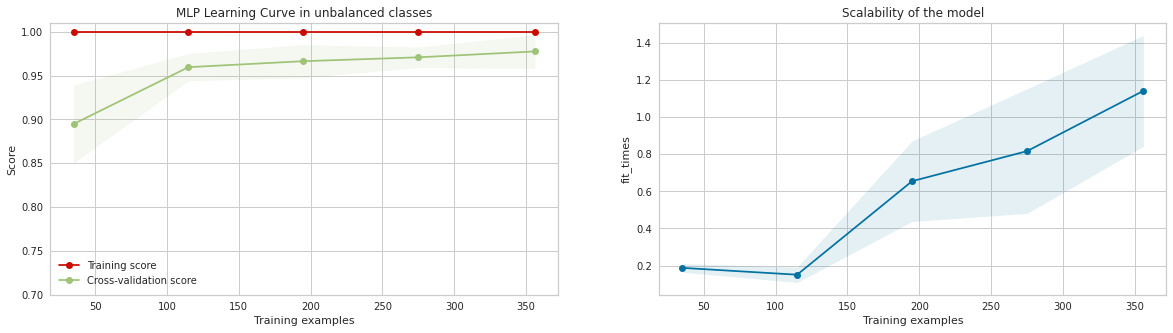

In [ ]:
sns.set_style('whitegrid')

plot_learning_curve(
    model,
    "MLP Learning Curve in unbalanced classes",
    x_train,
    y_train,
    ylim=(0.7, 1.01),
    n_jobs=4,
    cv=5
)

###Predict

In [ ]:
previsoes = model.predict(x_test)
previsoes

array([6, 6, 2, 1, 2, 2, 6, 1, 3, 4, 3, 1, 1, 3, 3, 2, 3, 1, 3, 5, 6, 6,
       1, 2, 3, 3, 1, 6, 3, 6, 3, 1, 3, 4, 4, 3, 6, 6, 1, 3, 4, 4, 1, 6,
       6, 3, 6, 1, 6, 2, 3, 6, 1, 5, 4, 5, 1, 1, 1, 2, 5, 3, 1, 1, 1, 5,
       2, 3, 4, 5, 3, 5, 4, 2, 5, 4, 6, 5, 3, 5, 4, 2, 1, 1, 4, 5, 5, 4,
       1, 6, 5, 6, 5, 2, 5, 3, 4, 5, 5, 4, 1, 1, 6, 2, 5, 5, 6, 5, 2, 4,
       3, 5, 3, 2, 4, 3, 6, 6, 5, 1, 3, 3, 2, 2, 4, 4, 2, 6, 5, 6, 3, 3,
       2, 5, 5, 2, 1, 4, 4, 1, 2, 6, 6, 2, 2, 1, 1, 3, 6, 3, 2, 6, 1, 5,
       3, 4, 5, 5, 3, 6, 4, 4, 2, 3, 1, 2, 1, 4, 6, 3, 5, 1, 5, 6, 5, 4,
       5, 3, 4, 2, 4, 5, 3, 4, 5, 2, 6, 6, 3, 5, 5, 4, 3, 2, 6, 5, 6, 5,
       4, 4, 5, 6, 5, 5, 4, 2, 4, 6, 4, 2, 4, 6, 4, 4, 5, 3, 3, 3, 4, 2])

In [ ]:
acuracia = accuracy_score(y_test, previsoes)
print("Acuracia: ", acuracia*100)

Acuracia:  97.72727272727273


In [ ]:
score_roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')
print("ROC AUC Score: {}".format(score_roc_auc*100))

ROC AUC Score: 99.80625206592056


###Precision-Recall Curve

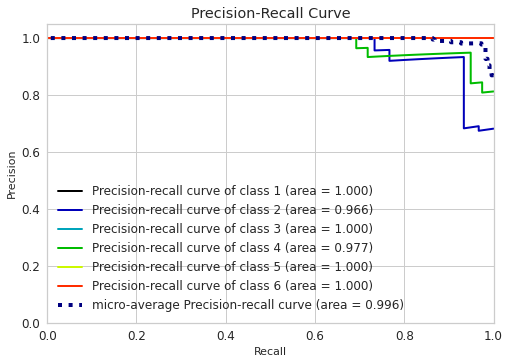

In [ ]:
probas = model.predict_proba(x_test)
skplt.metrics.plot_precision_recall(y_test, probas)

###ROC Curves

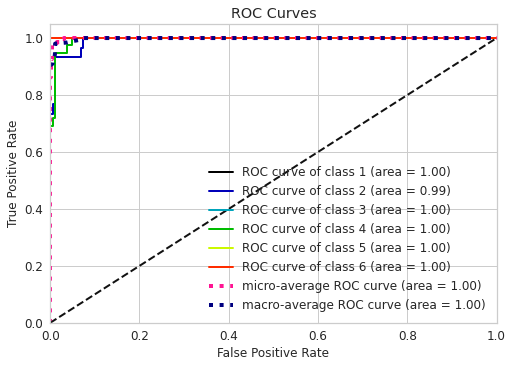

In [ ]:
skplt.metrics.plot_roc(y_test, probas)

###Conclusoes

Balancing the classes contributed a lot for the model to have a great performance, I realized that after using the "Momentum" parameter, the model's performance evolves a lot, to the point of having an overffiting. But after using the oversampling technique, everything improved.

I run this model sometimes, in the first, i had a overffiting. Now, for the third time, there was no overffting.

#Regression

In [ ]:
df = pd.read_csv("machine.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132




1. vendor name: 30
(adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec,
dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson,
microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry,
sratus, wang)
2. Model Name: many unique symbols
3. MYCT: machine cycle time in nanoseconds (integer)
4. MMIN: minimum main memory in kilobytes (integer)
5. MMAX: maximum main memory in kilobytes (integer)
6. CACH: cache memory in kilobytes (integer)
7. CHMIN: minimum channels in units (integer)
8. CHMAX: maximum channels in units (integer)
9. PRP: published relative performance (integer)
10. ERP: estimated relative performance from the original article (integer)

In [ ]:
df.columns = ['vendor_name', 'Model_Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
df.head()

,vendor_name,Model_Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [ ]:
df.shape

(209, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor_name  209 non-null    object
 1   Model_Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [ ]:
df['vendor_name'].value_counts()

ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
cdc              9
amdahl           9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
ipl              6
magnuson         6
cambex           5
prime            5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
bti              2
basf             2
apollo           2
microdata        1
four-phase       1
sratus           1
adviser          1
Name: vendor_name, dtype: int64

In [ ]:
df['Model_Name'].value_counts()

32/60     1
38/7      1
m80/32    1
m80/42    1
m80/43    1
         ..
100       1
300       1
500       1
600       1
vs-90     1
Name: Model_Name, Length: 209, dtype: int64

In [ ]:
df = df.drop(columns=['Model_Name', 'vendor_name'])
df.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


In [ ]:
df.isnull().sum()

MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
ERP      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

[]

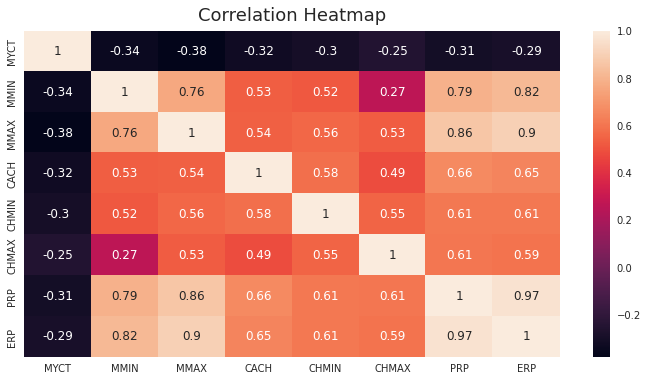

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Correlation Heatmap", fontdict=dict(size=18), pad=10)
sns.heatmap(df.corr(), annot=True)
plt.plot()

The goal is predict the "PRP"

In [ ]:
x = df.drop(columns=['PRP'])
y = df['PRP']

In [ ]:
scaler = MinMaxScaler()
new_x = scaler.fit_transform(x)

print(new_x)

[[0.07282535 0.00601202 0.09284284 ... 0.30769231 0.72727273 0.15044971]
 [0.00809171 0.24849699 0.4994995  ... 0.15384615 0.18181818 0.19460343]
 [0.00809171 0.24849699 0.4994995  ... 0.15384615 0.18181818 0.19460343]
 ...
 [0.07282535 0.06062124 0.12412412 ... 0.03846154 0.07954545 0.0212592 ]
 [0.31220499 0.01402806 0.12412412 ... 0.         0.         0.02616517]
 [0.31220499 0.02930862 0.06156156 ... 0.         0.         0.00817661]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.33)
print("Size train data: ", x_train.shape)
print("Size test data: ", x_test.shape)

Size train data:  (140, 7)
Size test data:  (69, 7)


In [ ]:
parameters = {'solver': ['lbfgs'],
              "activation": ["identity", "logistic", "tanh", "relu"],
              'max_iter': [1000,1100,1200,1300,1400,1800,1900,2000 ], 
              'alpha': 10.0 ** -np.arange(1, 10),
              'hidden_layer_sizes':np.arange(10, 15),
              'random_state':[0],
               'momentum': [0.1, 0.5, 0.9, 1]}


grid = GridSearchCV(MLPRegressor(), parameters, n_jobs=-1)

In [65]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=MLPRegressor(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': array([10, 11, 12, 13, 14]),
                         'max_iter': [1000, 1100, 1200, 1300, 1400, 1800, 1900,
                                      2000],
                         'momentum': [0.1, 0.5, 0.9, 1], 'random_state': [0],
                         'solver': ['lbfgs']})

In [66]:
grid.best_score_

0.8757000600518218

Here, we can see several network topologies

In [71]:
grid.cv_results_

{'mean_fit_time': array([0.1341857 , 0.13647466, 0.13812094, ..., 0.58033242, 0.58580456,
        0.52460184]),
 'std_fit_time': array([0.01573132, 0.01595264, 0.01153714, ..., 0.2078523 , 0.21423914,
        0.16330426]),
 'mean_score_time': array([0.00091462, 0.00094194, 0.00091558, ..., 0.00090923, 0.00093603,
        0.00087261]),
 'std_score_time': array([6.78530061e-05, 1.84612973e-05, 1.33355932e-05, ...,
        2.94408236e-05, 1.55590730e-05, 1.29388249e-04]),
 'param_activation': masked_array(data=['identity', 'identity', 'identity', ..., 'relu',
                    'relu', 'relu'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_alpha': masked_array(data=[0.1, 0.1, 0.1, ..., 1e-09, 1e-09, 1e-09],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_hidden_layer_sizes': masked_array(data=[10, 10, 10, ..., 14, 14, 14],
     

In [67]:
grid.best_params_

{'activation': 'relu',
 'alpha': 1e-06,
 'hidden_layer_sizes': 12,
 'max_iter': 1000,
 'momentum': 0.1,
 'random_state': 0,
 'solver': 'lbfgs'}

In [68]:
model = MLPRegressor(alpha=0.1, hidden_layer_sizes=12,
 max_iter=1000, random_state=0, solver='lbfgs', momentum=0.1, activation='relu')

model.fit(x_train, y_train)

MLPRegressor(alpha=0.1, hidden_layer_sizes=12, max_iter=1000, momentum=0.1,
             random_state=0, solver='lbfgs')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

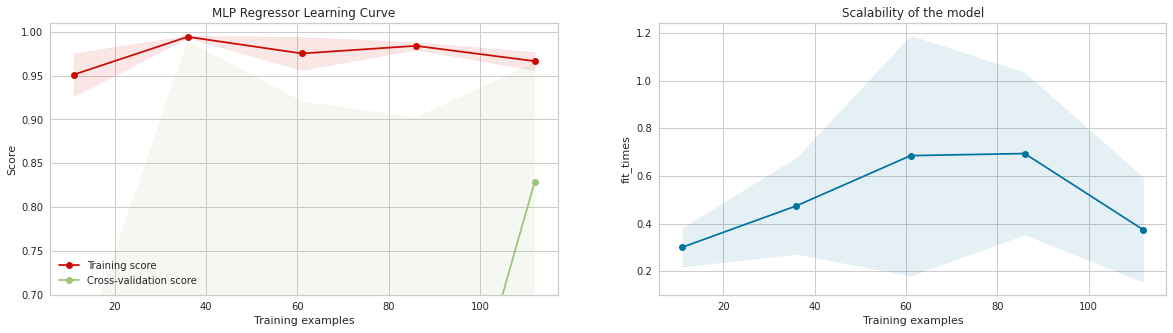

In [69]:
sns.set_style('whitegrid')

plot_learning_curve(
    model,
    "MLP Regressor Learning Curve",
    x_train,
    y_train,
    ylim=(0.7, 1.01),
    n_jobs=4,
    cv=5
)

In [70]:
model.coefs_

[array([[-9.96197686e-01,  1.69940303e-01, -3.01810676e+00,
          4.92860603e-02, -1.60616823e-01, -7.07359248e-01,
          2.83917574e-01, -7.45230224e-01,  3.81556079e-01,
         -3.78925768e+01,  9.52169022e-01,  3.17294065e-02],
        [ 1.07124146e+00, -5.92785076e+00,  2.03923689e+00,
         -4.53371817e-01,  2.45157507e+00, -2.61796535e+00,
          6.96473900e-01,  1.10531606e+01, -2.57760254e+00,
          1.09828181e+01, -3.55017727e-02,  3.08048070e-01],
        [ 3.69771797e+00, -6.24450468e+00,  1.24656004e+01,
          4.88289324e-01,  4.12495077e+00, -4.89917442e+00,
          1.87323574e-01,  1.66415052e+01, -5.86873483e+00,
          9.11822967e+00, -5.92325805e-01,  1.29175112e-01],
        [ 8.09276720e+00, -4.61289353e+00,  2.92942598e+01,
          1.99656210e-01, -3.82675255e+00, -3.89089467e+00,
         -2.17716173e-02,  3.98219776e+00, -3.56736106e+00,
         -1.09424553e+01, -3.30245575e-01, -4.07474686e-01],
        [ 3.07321552e+00, -3.8726628

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [73]:
previsoes = model.predict(x_test)
print(previsoes)

[ 59.76260415  28.60819613  31.32572275  32.03524225 400.65399946
  64.79938182 273.54626345 165.93976622 215.49685777  36.4564507
  26.52349958  31.14214502  19.49880946  31.9924281   16.67759398
  68.64676403  65.0860114   18.36418439 339.90640028  30.44041903
  40.56615568  66.0360469   35.65098278  90.7029402  169.59994422
  28.86680061  48.08603635  40.63364413  28.00026821  94.438194
  42.72612031  77.35377029  22.08246355 161.28100517  31.05926486
  48.71693647  26.0908793   28.04989609  81.38965244 182.63867567
  43.46993629 162.35674227  36.99611992 772.82198685 123.69135511
 306.87692141  26.39540859 451.95328148   8.42283724 322.97546545
 322.97546545  23.86829023  41.53680384  87.20674841  23.86829023
  23.86829023  57.82077789 451.95328148 376.49162454  30.53214808
  60.48187267  13.99053413  44.65375658  25.87373466 196.58638583
  65.54549438  18.0989497   32.54226089  31.05926486]


In [74]:
mae = mean_absolute_error(previsoes, y_test)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  28.44159782608806


In [75]:
mse = mean_squared_error(previsoes, y_test)
print("Mean Squared Error: ", mse)

Mean Squared Error:  1799.6290255199601


In [77]:
rmse = np.sqrt(mean_squared_error(previsoes, y_test))
print("Root Mean Square Error: ", rmse)

Root Mean Square Error:  42.42203466973219
